In [1]:
class cluster:

    def __init__(self):
        pass

    def fit(self, X):
        pass

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [3]:
class Kmeans(cluster):
    
    def __init__(self, K=5, max_iters=100, balanced = False):
        self.K = K
        self.max_iters = max_iters
        self.balanced = balanced
        
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []
    
    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # randomly place the k centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False) 
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        # Repeat until converged:
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids) and (balanced is False):
                break
            elif self._is_converged(centroids_old, self.centroids) and (balanced is True):
                self._make_cluster_balanced(self.centroids, self.clusters, self.balanced)
            
                

            # Classify samples as the index of their clusters
            return self._get_cluster_labels(self.clusters), self.centroids
        
    def _make_cluster_balanced(self, centroids, clusters, balanced):
        pass
        
        
    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
        
    def _get_centroids(self, clusters):
            # assign mean value of clusters to centroids
            centroids = np.zeros((self.K, self.n_features))
            for cluster_idx, cluster in enumerate(clusters):
                cluster_mean = np.mean(self.X[cluster], axis=0)
                centroids[cluster_idx] = cluster_mean
            return centroids
    
    def _is_converged(self, centroids_old, centroids):
            # distances between each old and new centroids, fol all centroids
            distances = [
                euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
            ]
            return sum(distances) == 0
        
    def _get_cluster_labels(self, clusters):
            # each sample will get the label of the cluster it was assigned to
            labels = np.empty(self.n_samples) # label is just the index of centroids

            for cluster_idx, cluster in enumerate(clusters):
                for sample_index in cluster:
                    labels[sample_index] = cluster_idx
            return labels
        
    def plot(self):
            fig, ax = plt.subplots(figsize=(12, 8))

            for i, index in enumerate(self.clusters):
                point = self.X[index].T
                ax.scatter(*point)

            for point in self.centroids:
                ax.scatter(*point, marker="x", color="black", linewidth=2)

            plt.show()
        

In [4]:
import pandas as pd

df = pd.read_csv('historical-weather.csv')
df

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,300,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,400,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,1586800,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15869,1586900,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15870,1587000,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15871,1587100,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7


In [5]:
# drop the rowID column to better visualize the results, since rowID is not related to the content of the dataset
df_temp = df.drop(['rowID'], axis = 1)
df_temp

,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...
15868,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15869,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15870,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15871,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7


In [6]:
corr = df_temp.corr()
corr

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
air_pressure,1.000000,0.046296,-0.197714,-0.077352,-0.217877,-0.060287,-0.142218,-0.094720,-0.080481,-0.112794,-0.375241
air_temp,0.046296,1.000000,-0.014719,-0.209340,-0.046445,-0.209983,0.025727,-0.201580,-0.059231,-0.113693,-0.620038
avg_wind_direction,-0.197714,-0.014719,1.000000,-0.027794,0.715839,-0.028626,0.621677,-0.031545,0.015005,0.025888,0.206526
avg_wind_speed,-0.077352,-0.209340,-0.027794,1.000000,0.022464,0.985016,-0.114903,0.971058,0.089419,0.091910,0.059483
max_wind_direction,-0.217877,-0.046445,0.715839,0.022464,1.000000,0.021483,0.421736,0.015318,0.018410,0.036116,0.239168
max_wind_speed,-0.060287,-0.209983,-0.028626,0.985016,0.021483,1.000000,-0.110048,0.926046,0.088740,0.097858,0.047763
min_wind_direction,-0.142218,0.025727,0.621677,-0.114903,0.421736,-0.110048,1.000000,-0.118068,0.004749,0.007557,0.133838
min_wind_speed,-0.094720,-0.201580,-0.031545,0.971058,0.015318,0.926046,-0.118068,1.000000,0.076147,0.074413,0.071531
rain_accumulation,-0.080481,-0.059231,0.015005,0.089419,0.018410,0.088740,0.004749,0.076147,1.000000,0.553623,0.067226
rain_duration,-0.112794,-0.113693,0.025888,0.091910,0.036116,0.097858,0.007557,0.074413,0.553623,1.000000,0.129050


In [7]:
# find what has the highest correlation to wind direction
corr['avg_wind_direction'].sort_values(ascending = False)

avg_wind_direction    1.000000
max_wind_direction    0.715839
min_wind_direction    0.621677
relative_humidity     0.206526
rain_duration         0.025888
rain_accumulation     0.015005
air_temp             -0.014719
avg_wind_speed       -0.027794
max_wind_speed       -0.028626
min_wind_speed       -0.031545
air_pressure         -0.197714
Name: avg_wind_direction, dtype: float64

In [8]:
# find what has the highest correlation to wind speed
corr['avg_wind_speed'].sort_values(ascending = False)

avg_wind_speed        1.000000
max_wind_speed        0.985016
min_wind_speed        0.971058
rain_duration         0.091910
rain_accumulation     0.089419
relative_humidity     0.059483
max_wind_direction    0.022464
avg_wind_direction   -0.027794
air_pressure         -0.077352
min_wind_direction   -0.114903
air_temp             -0.209340
Name: avg_wind_speed, dtype: float64

In [9]:
# find what has the highest correlation to humidity
corr['relative_humidity'].sort_values(ascending = False)

relative_humidity     1.000000
max_wind_direction    0.239168
avg_wind_direction    0.206526
min_wind_direction    0.133838
rain_duration         0.129050
min_wind_speed        0.071531
rain_accumulation     0.067226
avg_wind_speed        0.059483
max_wind_speed        0.047763
air_pressure         -0.375241
air_temp             -0.620038
Name: relative_humidity, dtype: float64

In [10]:
# find what has the highest correlation to rain duration
corr['rain_duration'].sort_values(ascending = False)

rain_duration         1.000000
rain_accumulation     0.553623
relative_humidity     0.129050
max_wind_speed        0.097858
avg_wind_speed        0.091910
min_wind_speed        0.074413
max_wind_direction    0.036116
avg_wind_direction    0.025888
min_wind_direction    0.007557
air_pressure         -0.112794
air_temp             -0.113693
Name: rain_duration, dtype: float64

In [11]:
# will use features: relative_humidity and max_wind_direction for KMeans 
humidity = df['relative_humidity']
humidity

0        60.5
1        63.9
2        33.4
3        58.2
4        89.8
         ... 
15868    43.2
15869    42.8
15870    43.9
15871    46.7
15872    47.8
Name: relative_humidity, Length: 15873, dtype: float64

In [12]:
max_wind_direc = df['max_wind_direction']
max_wind_direc

0        106.0
1        106.0
2         69.0
3        197.0
4        191.0
         ...  
15868    238.0
15869    196.0
15870    352.0
15871     24.0
15872    348.0
Name: max_wind_direction, Length: 15873, dtype: float64

In [13]:
data = {
    'Relative Humidity' : humidity,
    'Max Wind Direction' : max_wind_direc
}
data

{'Relative Humidity': 0        60.5
 1        63.9
 2        33.4
 3        58.2
 4        89.8
          ... 
 15868    43.2
 15869    42.8
 15870    43.9
 15871    46.7
 15872    47.8
 Name: relative_humidity, Length: 15873, dtype: float64,
 'Max Wind Direction': 0        106.0
 1        106.0
 2         69.0
 3        197.0
 4        191.0
          ...  
 15868    238.0
 15869    196.0
 15870    352.0
 15871     24.0
 15872    348.0
 Name: max_wind_direction, Length: 15873, dtype: float64}

In [14]:
X = pd.DataFrame(data)
X

,Relative Humidity,Max Wind Direction
0,60.5,106.0
1,63.9,106.0
2,33.4,69.0
3,58.2,197.0
4,89.8,191.0
...,...,...
15868,43.2,238.0
15869,42.8,196.0
15870,43.9,352.0
15871,46.7,24.0


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Relative Humidity   15873 non-null  float64
 1   Max Wind Direction  15870 non-null  float64
dtypes: float64(2)
memory usage: 248.1 KB


In [16]:
X.shape

(15873, 2)

In [17]:
X = X.dropna()
X

,Relative Humidity,Max Wind Direction
0,60.5,106.0
1,63.9,106.0
2,33.4,69.0
3,58.2,197.0
4,89.8,191.0
...,...,...
15868,43.2,238.0
15869,42.8,196.0
15870,43.9,352.0
15871,46.7,24.0


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15870 entries, 0 to 15872
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Relative Humidity   15870 non-null  float64
 1   Max Wind Direction  15870 non-null  float64
dtypes: float64(2)
memory usage: 372.0 KB


In [19]:
X.shape

(15870, 2)

In [20]:
X = X.to_numpy()

In [21]:
X.shape

(15870, 2)

In [22]:
k = Kmeans(K = 5, max_iters = 100, balanced = False)
k

In [23]:
fit = k.fit(X)

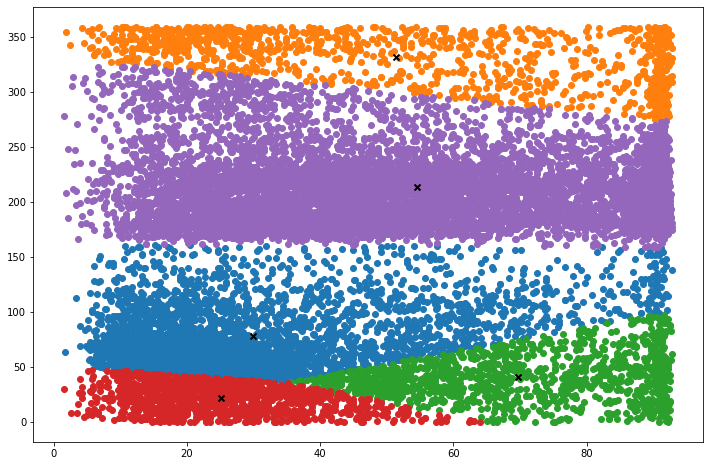

In [24]:
k.plot()

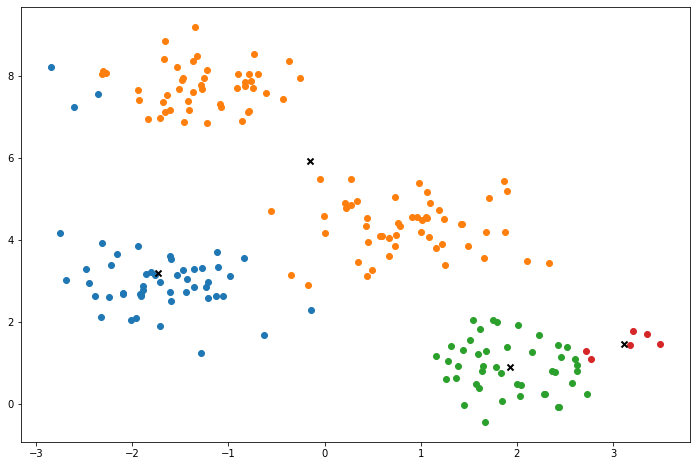

In [25]:
# test
from sklearn.datasets import make_blobs
X, cluster_assignments = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)
k = Kmeans(K=4, max_iters=100, balanced = False)
cluster_assignments_fit = k.fit(X)

k.plot()

In [26]:
cluster_assignments_fit

(array([2., 0., 1., 0., 2., 1., 0., 1., 1., 1., 1., 2., 0., 0., 3., 1., 1.,
        1., 1., 2., 1., 0., 2., 0., 2., 2., 1., 2., 2., 1., 1., 1., 0., 2.,
        0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 0., 2., 1., 3., 0., 1., 2., 1., 1., 1., 2., 1.,
        0., 0., 2., 2., 1., 1., 0., 1., 0., 0., 3., 2., 1., 1., 2., 0., 0.,
        1., 1., 2., 0., 0., 1., 1., 1., 1., 1., 2., 0., 1., 1., 1., 1., 2.,
        3., 1., 1., 0., 1., 2., 2., 1., 1., 0., 0., 2., 2., 1., 0., 0., 1.,
        1., 1., 0., 1., 2., 1., 0., 1., 0., 2., 1., 0., 2., 1., 1., 1., 0.,
        1., 1., 2., 1., 2., 0., 2., 2., 0., 2., 1., 3., 0., 0., 1., 1., 1.,
        0., 2., 1., 1., 0., 1., 2., 1., 2., 2., 0., 0., 1., 1., 2., 3., 0.,
        2., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 2., 1., 2., 1., 0., 0.,
        1., 1., 1., 2., 2., 1., 1., 0., 0., 0., 1., 1., 2.]),
 array([[-1.73481339,  3.19065808],
        [-0.14898587,  5.92908841],
        [ 1.9292636 ,  0.90776